Using we versus they language when talking about wins/losses. 

In [1]:
import praw
import reddit_authentication
import csv
import pandas as pd
import os
import seaborn as sns

# Create an instance called reddit. We'll use this to call the API.
reddit = praw.Reddit(client_id=reddit_authentication.client_id,
                     client_secret=reddit_authentication.client_secret,
                    user_agent = reddit_authentication.user_agent,
                    username = reddit_authentication.username,
                    password = reddit_authentication.password)

In [10]:
with open('./submissions.csv', 'w') as f:
    out = csv.writer(f)
    out.writerow(['id', 'title', 'author', 'created_utc', 'comments_retrieved', 'flair'])
    for submission in reddit.subreddit('CFB').top(limit=None, time_filter = 'year'):
        try:
            name = submission.author.name
            print(name)
        except AttributeError:
            name = None
            # print(submission)
        out.writerow([submission.id, submission.title, name, submission.created_utc, False])

CFB_Referee
magnumweiner
CFB_Referee
souldeux
dogwoodmaple
Cluck_Kent717
CFB_Referee
JoshGordonsDealer
CFB_Referee
CFB_Referee
dkviper11
CFB_Referee
reasonableoption
CFB_Referee
CFB_Referee
BigDMag
Arleen_Vacation
CFB_Referee
jacksnyder2
aggiebruin27
Guardax
ZeldaFanBoi1988
Feliciafancibottom
CFB_Referee
lmxbftw
hornsrock
CFB_Referee
TrojanMan35T
dogwoodmaple
CFB_Referee
NotABurner316
thehopelesswanderer
PrimalCookie
TinderForMidgets
CFB_Referee
delflower
texas1hunter
Jay_Dubbbs
LamarcusAldrige1234
DontTakeOurCampbell
CFB_Referee
CFB_Referee
PatrickChase
foreveracubone
refekt
CosmicCornbread
qwerty07020
PHLdawg
MonsterBush30
PocketPillow
Ria-QW_Burner
ConstantMadness
Elbit_Curt_Sedni
LES212
EWall100
CFB_Referee
moyboi2112
refekt
J4ckiebrown
jah05r
The0hman
Johnnycockseed
PHLdawg
dogwoodmaple
Iamdumberdore
Bluemzv12
Please_PM_me_Uranus
LamarcusAldrige1234
Captain_Sacktap
autoscopy
kyleb402
Trojanxiety
sickmemes48
Druid00
VictorM51
The_Astros_Cheated
LamarcusAldrige1234
arrowfan624
Behin

In [12]:
with open('./submissions.csv', 'wb') as f:
    out = csv.writer(f)
    out.writerow(['id', 'title', 'author', 'created_utc', 'comments_retrieved', 'flair'])
    for submission in reddit.subreddit('CFB').top(limit=None, time_filter='year'):
        try:
            name = submission.author.name
            print(name)
        except AttributeError:
            name = None
            # print(submission)
        out.writerow([submission.id,submission.title,name,submission.created_utc,False])

TypeError: a bytes-like object is required, not 'str'

In [15]:
import csv

with open('./submissions.csv', 'w', newline='') as f:
    out = csv.writer(f)
    out.writerow(['id', 'title', 'author', 'created_utc', 'comments_retrieved', 'flair'])
    for submission in reddit.subreddit('CFB').top(limit=None, time_filter='year'):
        try:
            name = submission.author.name
            print(name)
        except AttributeError:
            name = None
            # print(submission)
        out.writerow([submission.id, submission.title, name, submission.created_utc, False])


CFB_Referee
magnumweiner
CFB_Referee
souldeux
dogwoodmaple
Cluck_Kent717
CFB_Referee
JoshGordonsDealer
CFB_Referee
CFB_Referee
dkviper11
CFB_Referee
reasonableoption
CFB_Referee
CFB_Referee
BigDMag
Arleen_Vacation
CFB_Referee
jacksnyder2
aggiebruin27
Guardax
ZeldaFanBoi1988
Feliciafancibottom
CFB_Referee
lmxbftw
hornsrock
CFB_Referee
TrojanMan35T
dogwoodmaple
CFB_Referee
NotABurner316
thehopelesswanderer
PrimalCookie
TinderForMidgets
CFB_Referee
delflower
texas1hunter
Jay_Dubbbs
LamarcusAldrige1234
DontTakeOurCampbell
CFB_Referee
CFB_Referee
PatrickChase
foreveracubone
refekt
CosmicCornbread
qwerty07020
PHLdawg
MonsterBush30
PocketPillow
Ria-QW_Burner
ConstantMadness
Elbit_Curt_Sedni
LES212
EWall100
CFB_Referee
moyboi2112
refekt
J4ckiebrown
jah05r
The0hman
Johnnycockseed
PHLdawg
dogwoodmaple
Iamdumberdore
Bluemzv12
Please_PM_me_Uranus
LamarcusAldrige1234
Captain_Sacktap
autoscopy
kyleb402
Trojanxiety
sickmemes48
Druid00
VictorM51
The_Astros_Cheated
LamarcusAldrige1234
arrowfan624
Behin

In [16]:
df = pd.read_csv('./submissions.csv')

# Check if the output file exists. If not, create it and write the header.

if not os.path.exists('./comments.csv'):
    with open('./comments.csv', 'w') as f:
        out = csv.writer(f)
        out.writerow(['id',
                      'body',
                      'author', 
                      'created_utc', 
                      'parent_id', 
                      'submission_id', 
                      'tot_awards_received', 
                      'ups', 
                      'downs', 
                      'score'])

for submission_id in df.loc[df.comments_retrieved == False, 'id']:
    print(f'Retrieving comments for {submission_id}')
    submission = reddit.submission(id=submission_id)
    # This sets the limit to None, which means that it will retrieve all comments.
    submission.comments.replace_more(limit=None)
    # Because we're only storing whether a submission was retrieved, we save all the comments and write them at the same time.
    curr_comments = []
    for comment in submission.comments.list():
        try:
            name = comment.author.name
        except AttributeError:
            name = None
        curr_comments.append([comment.id, 
                        comment.body, 
                        name, 
                        comment.created_utc, 
                        comment.parent_id,
                        submission.id,
                        comment.total_awards_received,
                        comment.ups,
                        comment.downs,
                        comment.score
                        ])
    with open('./comments.csv', 'a') as f:
        out = csv.writer(f)
        out.writerows(curr_comments)
    df.loc[df.id == submission_id, 'comments_retrieved'] = True
    df.to_csv('./submissions.csv', index=False)

Retrieving comments for z5hnxc


KeyboardInterrupt: 

In [25]:
# Read the submissions data from the CSV file
df = pd.read_csv('./submissions.csv')

# Check if the output file exists. If not, create it and write the header.
if not os.path.exists('./comments.csv'):
    with open('./comments.csv', 'w') as f:
        out = csv.writer(f)
        out.writerow(['id',
                      'body',
                      'author',
                      'created_utc',
                      'parent_id',
                      'submission_id',
                      'tot_awards_received',
                      'ups',
                      'downs',
                      'score'])

print("Starting comment retrieval loop")

# Loop through submissions and retrieve comments
for submission_id in df.loc[df.comments_retrieved == False, 'id']:
    print(f'Retrieving comments for {submission_id}')
    submission = reddit.submission(id=submission_id)
    submission.comments.replace_more(limit=None)
    
    curr_comments = []
    for comment in submission.comments.list():
        try:
            name = comment.author.name
        except AttributeError:
            name = None
        curr_comments.append([comment.id,
                              comment.body,
                              name,
                              comment.created_utc,
                              comment.parent_id,
                              submission.id,
                              comment.total_awards_received,
                              comment.ups,
                              comment.downs,
                              comment.score])

    # Append comments to the 'comments.csv' file
    with open('./comments.csv', 'a') as f:
        out = csv.writer(f)
        out.writerows(curr_comments)

    # Update the 'comments_retrieved' status for the submission in the DataFrame
    df.loc[df.id == submission_id, 'comments_retrieved'] = True

# Save the updated DataFrame to the 'submissions.csv' file
df.to_csv('./submissions.csv', index=False)



Starting comment retrieval loop
Retrieving comments for z5hnxc
Retrieving comments for zkwfw9


TooManyRequests: received 429 HTTP response

In [26]:
comments_df = pd.read_csv('./comments.csv')

comments_df['comment_length'] = comments_df.body.str.len()

commenter_stats = comments_df.groupby('author').agg(
    # Number of comments
    num_comments = ('id', 'count'),
    # Median comment length
    median_comment_length = ('comment_length', 'median'),
    # Median score
    median_score = ('score', 'median'),
).reset_index()

# Now, we need to grab the number of posts from the other CSV file, and merge the two together.

submissions_df = pd.read_csv('./submissions.csv')

submitter_stats = submissions_df.groupby('author').agg(
    num_posts = ('id', 'count')
).reset_index()

# Now, we can merge the two together.
merged_df = pd.merge(commenter_stats, submitter_stats, on='author', how='left')

In [27]:
merged_df.sort_values('num_posts', ascending=False)

,author,num_comments,median_comment_length,median_score,num_posts
995,LamarcusAldrige1234,1,51.0,4.0,35.0
1357,Piano_Fingerbanger,1,102.0,3.0,10.0
966,Kimber80,1,125.0,7.0,10.0
821,InVodkaVeritas,1,87.0,5.0,9.0
251,BuckeyeEmpire,7,93.0,2.0,8.0
...,...,...,...,...,...
3373,zombiebait23,1,66.0,10.0,NaN
3374,zorbathegrate,1,94.0,5.0,NaN
3375,zpk5003,1,25.0,8.0,NaN
3376,zsmitty,1,52.0,4.0,NaN


In [28]:
merged_df.to_csv('./cleaned_data.csv', index=False)

In [30]:
df = pd.read_csv('./cleaned_data.csv')

In [31]:
df.sort_values('num_comments')

,author,num_comments,median_comment_length,median_score,num_posts
0,--bLa--,1,62.0,1.0,NaN
2033,aeroazure,1,37.0,1.0,NaN
2036,aimiami,1,45.0,1.0,NaN
2037,airquotesNotAtWork,1,10.0,3.0,NaN
2038,akamandanr,1,62.0,1.0,NaN
...,...,...,...,...,...
1058,Lykeuhfox,36,36.0,7.0,NaN
424,Dead_Baby_Kicker,42,85.5,3.0,NaN
518,Elbit_Curt_Sedni,42,104.0,4.0,3.0
1062,MD90__,54,78.0,1.0,NaN


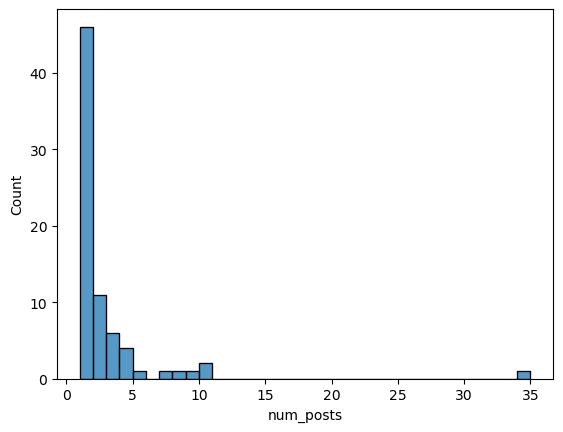

In [32]:
sns.histplot(x='num_posts', data = df, binwidth=1);

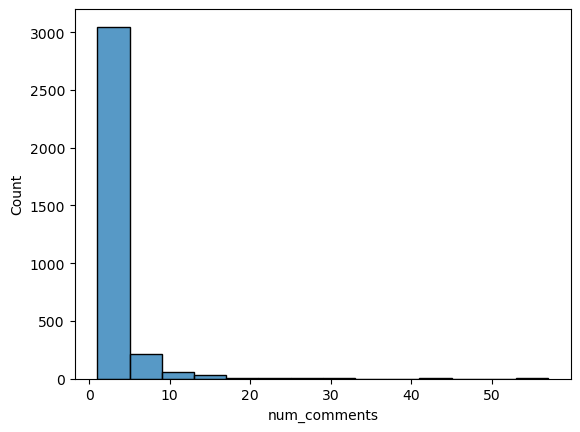

In [33]:
sns.histplot(x='num_comments', data = df, binwidth=4);